# Bidirectional LSTM RNN on Combined Snopes Data

In [1]:
# LSTM Bidirectional RNN
import pandas as pd

In [2]:
data = pd.read_csv('Data/SnopesGeneralDatav3.csv')

# 2 -> Other / Mixture/ All other labels
# 1 -> Fake / False
# 0 -> Not Fake / True

In [3]:
data.head()

,ID,Posts,Label
0,1,Did Kamala Harris Support Abortion Until the T...,Mixture
1,2,Did Hitler Invent the Inflatable Sex Doll?,FALSE
2,3,Pride Parade Fire Hydrant Mishap,FALSE
3,4,Did Trump Say He Might Sign an Exec Order Barr...,Mixture
4,5,Did the White House Watch the Benghazi Attack ...,FALSE


In [4]:
# For binary classsification
label = { 'FALSE': 0, 'TRUE': 1, 'Mixture': 1 } 

data.Label = [label[item] for item in data.Label]

In [5]:
data['Label'].unique()

array([1, 0], dtype=int64)

In [6]:
data['Label'].value_counts()

0    1756
1    1203
Name: Label, dtype: int64

In [7]:
# Remove label from data

X = data.drop(['ID', 'Label'], axis=1)
X.head()

,Posts
0,Did Kamala Harris Support Abortion Until the T...
1,Did Hitler Invent the Inflatable Sex Doll?
2,Pride Parade Fire Hydrant Mishap
3,Did Trump Say He Might Sign an Exec Order Barr...
4,Did the White House Watch the Benghazi Attack ...


In [8]:
# Store results

Y = data['Label']
Y.head()

0    1
1    0
2    0
3    1
4    0
Name: Label, dtype: int64

In [9]:
X.shape, Y.shape

((2959, 1), (2959,))

In [10]:
data.head()

,ID,Posts,Label
0,1,Did Kamala Harris Support Abortion Until the T...,1
1,2,Did Hitler Invent the Inflatable Sex Doll?,0
2,3,Pride Parade Fire Hydrant Mishap,0
3,4,Did Trump Say He Might Sign an Exec Order Barr...,1
4,5,Did the White House Watch the Benghazi Attack ...,0


In [11]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout

In [12]:
# Vocabulary size
vocab_size = 5000

In [13]:
# Onehot Representation
messages = X.copy()

In [14]:
messages['Posts'][2]

'Pride Parade Fire Hydrant Mishap'

In [15]:
# messages.reset_index(inplace = True)

In [16]:
# Stemming and stop word removal

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
#     type(messages['title'][i])
    review = re.sub('[^a-zA-Z]', ' ', str(messages['Posts'][i]))
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [17]:
corpus

['kamala harri support abort time give birth',
 'hitler invent inflat sex doll',
 'pride parad fire hydrant mishap',
 'trump say might sign exec order bar biden presid',
 'white hous watch benghazi attack noth',
 'color code toothpast tube identifi ingredi',
 'last surviv wwii veteran march alon memori day parad',
 'ruth bader ginsburg say pedophilia good children',
 'bow hunt wild hors',
 'dwayn johnson arrest',
 'firework explod woman shoplift attempt',
 'tim horton ad marijuana menu',
 'obama remov statu liberti offend muslim',
 'year old mama esifiho may oldest woman aliv',
 'cop shoot year old black babi mistak pacifi gun',
 'harvard studi reveal much damag instant noodl bodi',
 'alton sterl kill trump support robert kinnison',
 'monsanto buy whole food',
 'photograph show alton sterl children gun',
 'alton sterl longtim crimin gang member',
 'deray mckesson summer chao',
 'obama commiss gender neutral bibl',
 'dalla shooter identifi neo nazi jeffrey harri',
 'pride lion kill five

In [18]:
# One Hot encoding 

onehot_data = [one_hot(words, vocab_size) for words in corpus] 
onehot_data

[[4395, 4595, 550, 1460, 1250, 4490, 1679],
 [455, 1580, 2676, 4085, 72],
 [215, 4300, 2126, 4820, 3983],
 [2425, 2289, 607, 165, 3460, 3574, 3590, 3143, 4624],
 [4605, 1636, 1257, 4509, 3588, 718],
 [2787, 3708, 2713, 2063, 1766, 4473],
 [2523, 1615, 2950, 3240, 2068, 569, 1174, 4358, 4300],
 [247, 3936, 3847, 2289, 2958, 3476, 3296],
 [1927, 2075, 4435, 96],
 [707, 4182, 2197],
 [2993, 1947, 379, 1620, 3354],
 [4788, 2158, 1658, 801, 2432],
 [2902, 3717, 3090, 3953, 3080, 4474],
 [3172, 2152, 2599, 4216, 4672, 2479, 379, 4443],
 [910, 844, 3172, 2152, 2829, 1626, 3632, 4493, 3599],
 [3782, 1838, 11, 2346, 1332, 2527, 182, 2341],
 [2944, 3726, 2283, 2425, 550, 2229, 2865],
 [2188, 1003, 3267, 3593],
 [1466, 3759, 2944, 3726, 3296, 3599],
 [2944, 3726, 1833, 69, 388, 1509],
 [2585, 4800, 1018, 3594],
 [2902, 2413, 2512, 2398, 4117],
 [3886, 1622, 1766, 59, 4950, 3468, 4595],
 [215, 475, 2283, 529, 4447, 4465, 4828, 2368, 3607],
 [1553, 3750, 184, 1947],
 [4083, 1524, 2549, 2126, 3967, 

In [19]:
# Embedding

sentence_length = 20
embedded_data = pad_sequences(onehot_data, padding='pre', maxlen = sentence_length)
print(embedded_data)

[[   0    0    0 ... 1250 4490 1679]
 [   0    0    0 ... 2676 4085   72]
 [   0    0    0 ... 2126 4820 3983]
 ...
 [   0    0    0 ... 2172 3383 2826]
 [   0    0    0 ... 3421 1773 3922]
 [   0    0    0 ... 1073 4185 2545]]


In [20]:
embedded_data[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0, 4395, 4595,  550, 1460, 1250, 4490, 1679])

In [21]:
# Creating Bidirectional LSTM model

embedding_vector_features = 40
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_features, input_length = sentence_length))
model.add(LSTM(100))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 40)            200000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               56400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


In [22]:
# Creating second model

embedding_vector_features = 40
model1 = Sequential()
model1.add(Embedding(vocab_size, embedding_vector_features, input_length = sentence_length))
model1.add(Bidirectional(LSTM(100)))
model1.add(Dropout(0.3))
model1.add(Dense(1, activation = 'sigmoid'))
model1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
print(model1.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 40)            200000    
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               112800    
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 313,001
Trainable params: 313,001
Non-trainable params: 0
_________________________________________________________________
None


In [23]:
len(embedded_data), Y.shape

(2959, (2959,))

In [24]:
import numpy as np

X_final = np.array(embedded_data)
Y_final = np.array(Y)

In [25]:
X_final.shape, Y_final.shape

((2959, 20), (2959,))

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_final, Y_final, test_size = 0.33, random_state = 42)

In [33]:
# Training

history = model1.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size = 64, epochs = 10)

Epoch 1/10
31/31 [==============================] - 1s 17ms/step - loss: 0.0250 - accuracy: 0.9934 - val_loss: 2.3636 - val_accuracy: 0.5486
Epoch 2/10
31/31 [==============================] - 1s 16ms/step - loss: 0.0210 - accuracy: 0.9939 - val_loss: 2.6891 - val_accuracy: 0.5629
Epoch 3/10
31/31 [==============================] - 1s 17ms/step - loss: 0.0119 - accuracy: 0.9965 - val_loss: 2.7712 - val_accuracy: 0.5517
Epoch 4/10
31/31 [==============================] - 1s 17ms/step - loss: 0.0119 - accuracy: 0.9970 - val_loss: 2.8125 - val_accuracy: 0.5537
Epoch 5/10
31/31 [==============================] - 1s 16ms/step - loss: 0.0097 - accuracy: 0.9975 - val_loss: 2.9268 - val_accuracy: 0.5527
Epoch 6/10
31/31 [==============================] - 1s 17ms/step - loss: 0.0040 - accuracy: 0.9995 - val_loss: 3.1645 - val_accuracy: 0.5507
Epoch 7/10
31/31 [==============================] - 1s 16ms/step - loss: 0.0024 - accuracy: 0.9995 - val_loss: 3.3608 - val_accuracy: 0.5589
Epoch 8/10
31

In [28]:
# Prediction

y_pred = model1.predict(X_test)
y_pred

array([[1.06269121e-03],
       [4.37976718e-02],
       [9.94406998e-01],
       [8.08901386e-05],
       [4.52893972e-03],
       [9.99810934e-01],
       [9.99812007e-01],
       [1.86911225e-03],
       [2.17974186e-03],
       [1.15610361e-02],
       [1.38931364e-01],
       [9.99745250e-01],
       [2.45315731e-02],
       [9.99709308e-01],
       [6.36965036e-04],
       [7.32449353e-01],
       [9.96072769e-01],
       [1.46502256e-03],
       [3.38693798e-01],
       [9.99223769e-01],
       [1.56968832e-04],
       [3.21209729e-02],
       [9.99896646e-01],
       [1.76936388e-03],
       [2.32189894e-04],
       [6.51665866e-01],
       [2.71848440e-02],
       [5.11109829e-03],
       [6.21986765e-05],
       [9.88077819e-01],
       [2.43207812e-03],
       [7.83693790e-03],
       [2.41497159e-03],
       [4.85599041e-03],
       [8.48916173e-03],
       [5.65156341e-03],
       [9.99800563e-01],
       [9.99386549e-01],
       [9.93953884e-01],
       [9.99496460e-01],


In [29]:
# Performance and Accuracy
predictions = []
for i in range(len(y_pred)):
    if y_pred[i].item() > 0.5:
#         predictions.append(str(i) + " is Fake " + str(1))
        predictions.append(1)
    else:
#         predictions.append(str(i) +" is Not Fake " + str(0))
        predictions.append(0)

In [30]:
predictions

[0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,


In [31]:
results = model1.evaluate(X_test, y_test, batch_size = 64)
print("test loss, test acc:", results)

16/16 [==============================] - 0s 6ms/step - loss: 2.0118 - accuracy: 0.5629
test loss, test acc: [2.011842727661133, 0.5629478096961975]


In [34]:
# Creating classification report 
from sklearn import metrics

print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.61      0.69      0.65       566
           1       0.48      0.38      0.43       411

    accuracy                           0.56       977
   macro avg       0.54      0.54      0.54       977
weighted avg       0.55      0.56      0.55       977



In [35]:
import matplotlib.pyplot as plt

def graph_plots(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

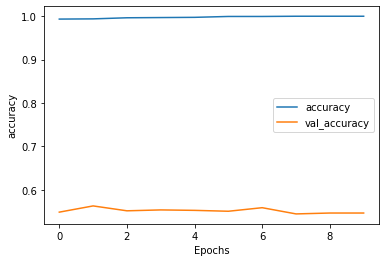

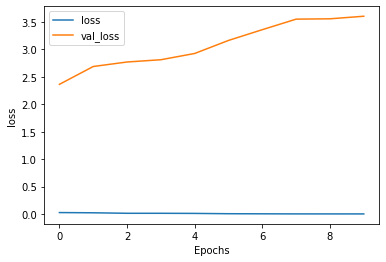

In [36]:
graph_plots(history, "accuracy")
graph_plots(history, "loss")